<IPython.core.display.Javascript object>


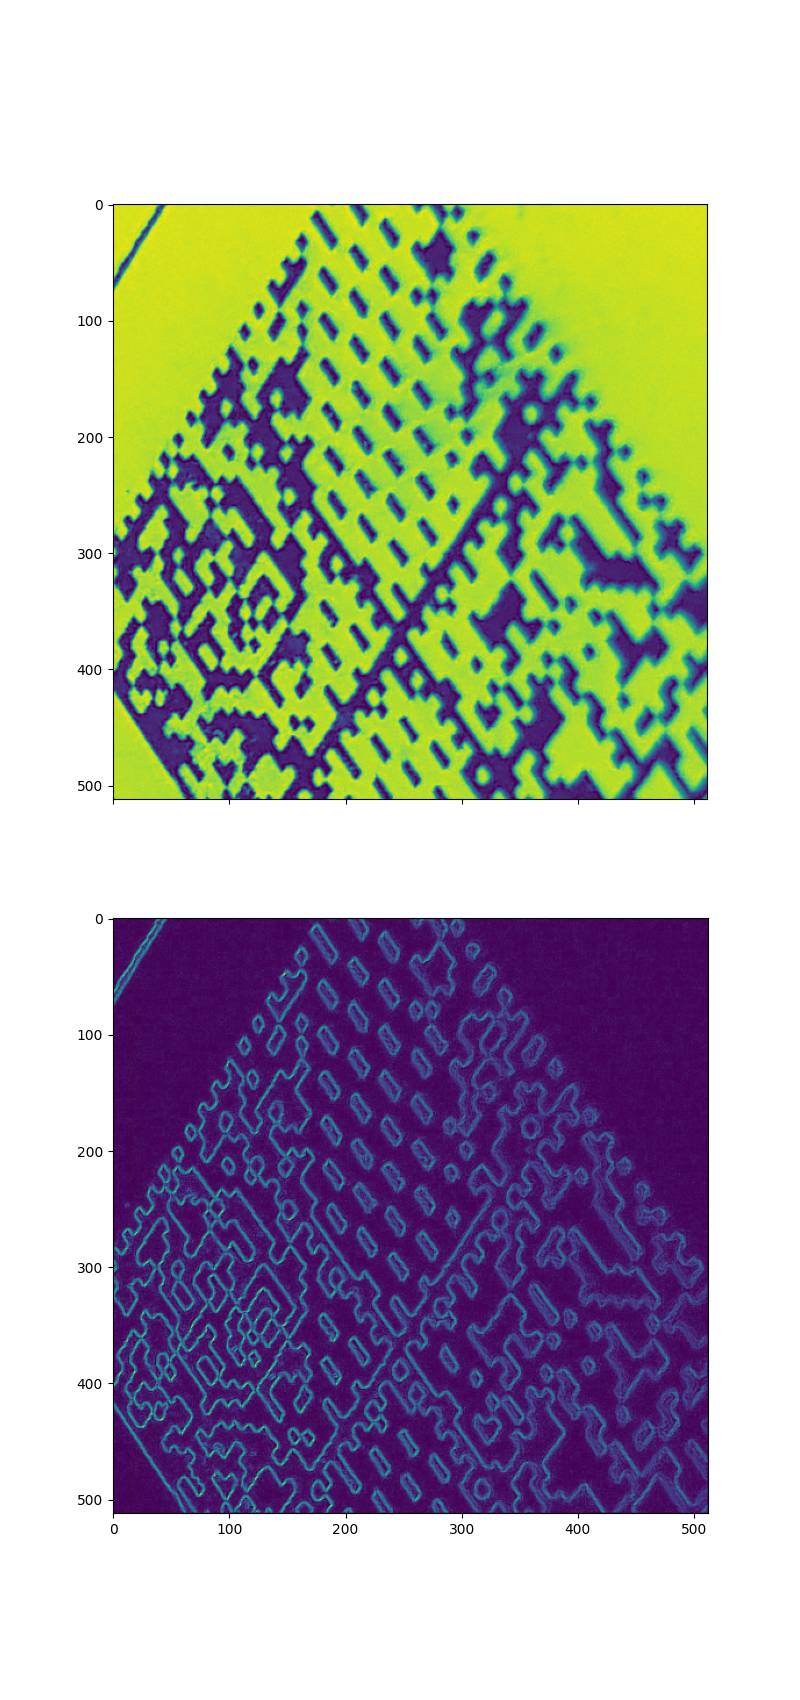

<IPython.core.display.Javascript object>


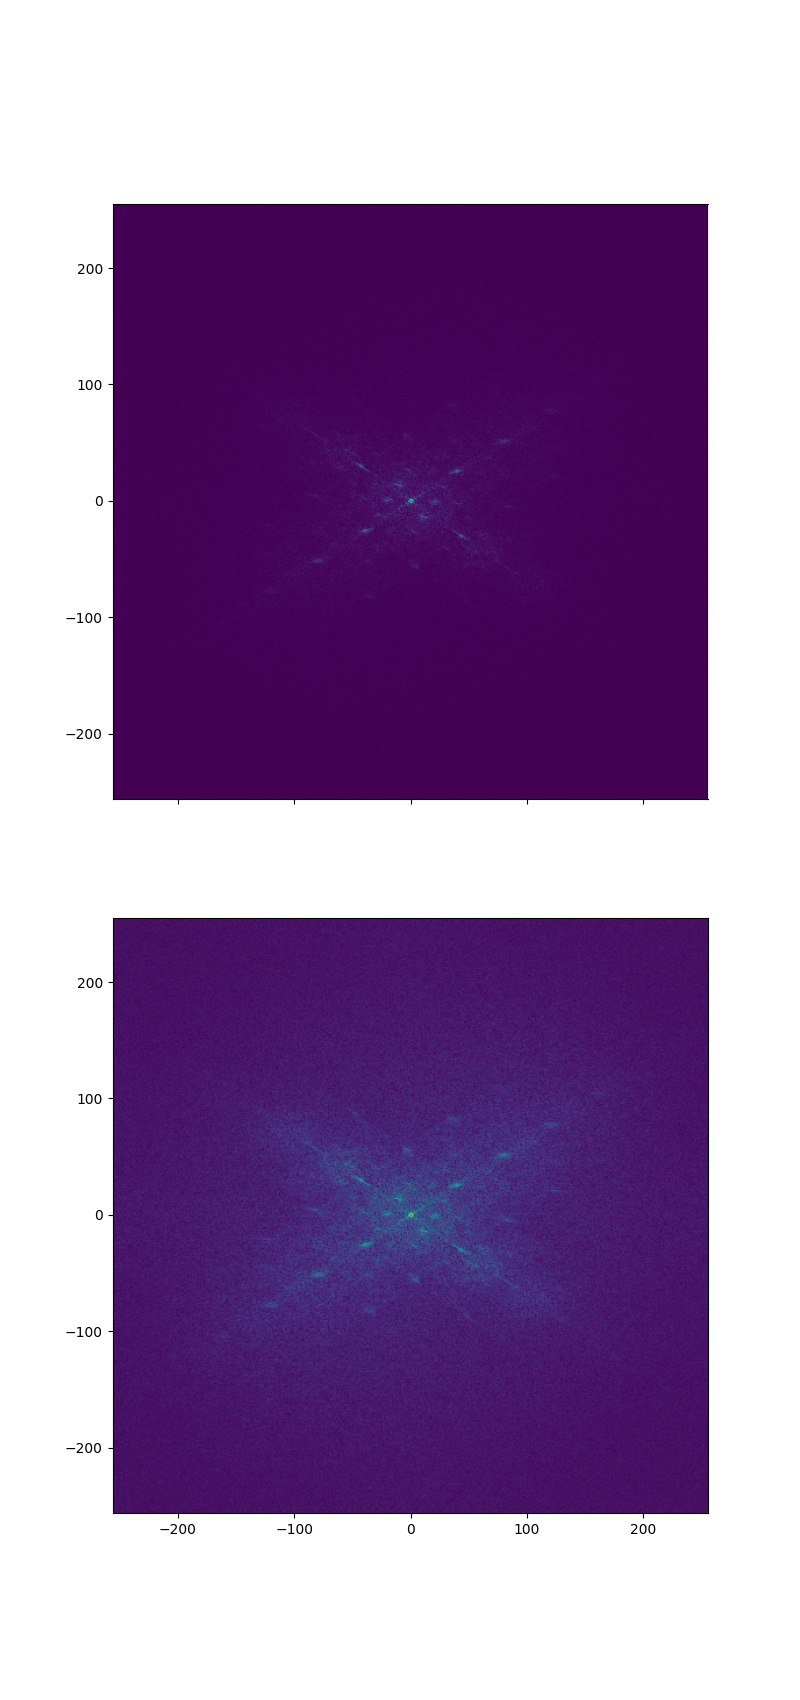

<IPython.core.display.Javascript object>


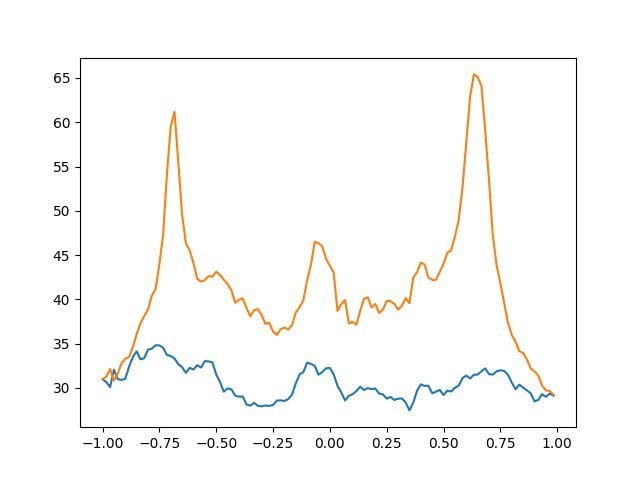

   12   -14  1.180 2.34340881368638
  -43    30  1.146 1.7016408987156122
   39    25  1.083 1.78111055016097
   13   -14  0.994 2.1732598172967674
    4     2  0.993 2.3110153712010506
   41    26  0.933 1.464569930677114
   38    25  0.930 1.7288831092632755
   40    25  0.917 1.948274027231122
   40    26  0.888 2.080963011426379
   11   -14  0.884 1.901344110313676
   42    26  0.882 1.4781973578750078
  -44    30  0.828 1.3570302941605519
  -44    31  0.812 1.479770870474283
Sorted by metric
  -44    30  0.828 1.3570302941605519
   41    26  0.933 1.464569930677114
   42    26  0.882 1.4781973578750078
  -44    31  0.812 1.479770870474283
  -43    30  1.146 1.7016408987156122
   38    25  0.930 1.7288831092632755
   39    25  1.083 1.78111055016097
   11   -14  0.884 1.901344110313676
   40    25  0.917 1.948274027231122
   40    26  0.888 2.080963011426379
   13   -14  0.994 2.1732598172967674
    4     2  0.993 2.3110153712010506
   12   -14  1.180 2.34340881368638


In [1]:
import sys

sys.path.append('..')

%matplotlib notebook
from edge_frequency_analysis import EdgeFrequencyAnalysis

im8 = EdgeFrequencyAnalysis("../images/20200525_003822.jpg")
im8.crop(1950, 900, 512, 512)
im8.analyze()
im8.analyze_slopes()
im8.list_maximums(40)

<IPython.core.display.Javascript object>


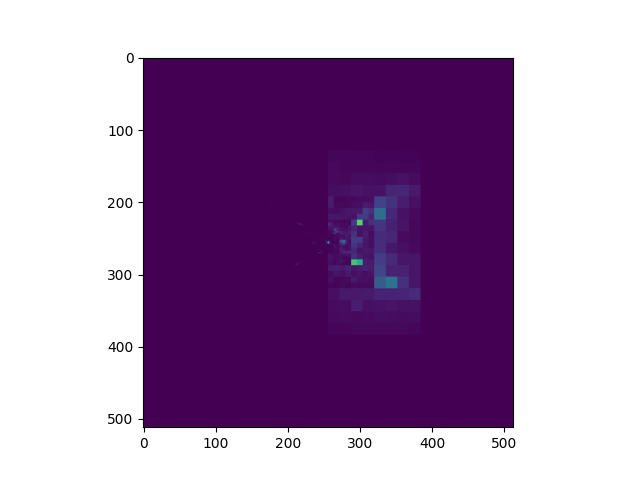

1 0 9.071956458963015
-1 0 9.071956458963015
-24 40 6.926424900100648
24 32 6.513268151139331
0 1 6.151156330985002
0 1 6.151156330985002
24 40 5.716096955312773
48 80 3.466872927450767
0 20 3.3646245923970737
-32 64 3.2747190677459828


In [4]:
import matplotlib.pyplot
import numpy

new_edges_f = abs(im8.edges_f)/im8.edges_f.size
new_edges_f = new_edges_f ** 2

# TODO: Make symmetric
parameters = [(0, 4, 1),
              #(2, 4, 1),
              (4, 8, 1),
              (8, 16, 2),
              (16, 32, 4),
              (32, 64, 8),
              (64, 128, 16),
              #(128, 256, 32),
             ]

results = []

for a, b, c in parameters:
    for i in range(a,b,c):
        for j in range(0,b,c):
            positive = 0
            negative = 0

            for k in range(i,i+c):
                for l in range(j, j+c):
                    positive += new_edges_f[k, l]
                    negative += new_edges_f[-k, l]
                    
            results.append((positive, i, j))
            results.append((negative, -i, j))
                    
            for k in range(i,i+c):
                for l in range(j, j+c):
                    new_edges_f[k, l] = positive
                    new_edges_f[-k, l] = negative
                    
    for i in range(0,a,c):
        for j in range(a,b,c):
            positive = 0
            negative = 0

            for k in range(i,i+c):
                for l in range(j, j+c):
                    positive += new_edges_f[k, l]
                    negative += new_edges_f[-k, l]

            results.append((positive, i, j))
            results.append((negative, -i, j))
                    
            for k in range(i,i+c):
                for l in range(j, j+c):
                    new_edges_f[k, l] = positive
                    new_edges_f[-k, l] = negative
    

figure, axeses = matplotlib.pyplot.subplots(1,1)
axeses.imshow(numpy.fft.fftshift(new_edges_f))
figure.show()

for value, x, y in reversed(sorted(results)[-10:]):
    print(x, y, value)